<a href="https://colab.research.google.com/github/pagliacci0411/Filtro-de-documentos-por-Visual-Transformers/blob/main/Filtro_de_documentos_por_Visual_Transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Índice del Código - Filtro de Documentos con ViT

Este código realiza la clasificación de imágenes para filtrar documentos utilizando la arquitectura Vision Transformer (ViT). A continuación, se presenta un índice con las etapas del código y una breve descripción de cada una:

**1. Librerías y Funciones (Líneas 1-60)**
   - **Instalables (Líneas 8-15):** Instalación de las librerías UMAP (reducción de dimensionalidad) y PyCaret (análisis y modelado de datos).
   - **Importar Librerías (Líneas 18-31):** Importación de las librerías necesarias para el procesamiento de imágenes, la clasificación con ViT, la visualización y el análisis de datos.
   - **Funciones (Líneas 34-59):** Definición de dos funciones:
      - `vectorize_image()`: Vectoriza una imagen utilizando el modelo ViT, generando una representación numérica (encoding) de la misma.
      - `create_image_df()`: Crea un DataFrame con información de las imágenes en un directorio, incluyendo nombre, ruta y categoría.

**2. Importar Datos (Líneas 63-74)**
   - Se utiliza la función `create_image_df()` para crear un DataFrame (`df`) con información de las imágenes en el directorio especificado.
   - Se muestra la cabecera del DataFrame (`df.head()`) y se contabiliza el número de filas (`df.count()`) y nombres de imágenes únicos (`df.image_name.nunique()`).

**3. Modelo (Líneas 77-132)**
   - **Carga del Modelo y Extractor de Características (Líneas 80-82):** Se carga el modelo ViT pre-entrenado (`google/vit-base-patch16-224-in21k`) y su extractor de características.
   - **Procesamiento y Codificación de Imágenes de Ejemplo (Líneas 85-107):** Se procesan tres imágenes de ejemplo utilizando el modelo ViT y se generan sus codificaciones vectoriales (encodings).
   - **Cálculo de Similitud Coseno (Líneas 110-131):** Se calcula la similitud coseno entre las codificaciones de las imágenes de ejemplo utilizando la función `nn.CosineSimilarity()` de PyTorch. Se imprimen los resultados.

**4. Procesamiento con Imágenes del Proyecto (Líneas 135-149)**
   - Se aplica la función `vectorize_image()` a todas las imágenes del proyecto para generar sus codificaciones vectoriales.
   - Se crea un nuevo DataFrame (`vectorized_df`) con los resultados.
   - Se guarda el DataFrame en un archivo CSV (`vectorized_images.csv`).

**5. Clusterización (Líneas 152-232)**
   - **Preparación de Datos (Líneas 155-166):** Se carga el DataFrame `vectorized_df` y se pre-procesa para la clusterización.
   - **Reducción de Dimensionalidad con UMAP (Líneas 169-173):** Se utiliza UMAP para reducir la dimensionalidad de las codificaciones vectoriales, facilitando la visualización y la clusterización.
   - **Visualización de la Proyección UMAP (Líneas 176-178):** Se visualiza la proyección UMAP con Plotly, mostrando las imágenes agrupadas por categoría.
   - **Visualización de Imágenes de Ejemplo (Líneas 181-198):** Se seleccionan y visualizan 6 imágenes aleatorias del dataset.
   - **Clusterización con HDBSCAN (Líneas 201-207):** Se aplica el algoritmo HDBSCAN para agrupar las imágenes en clústeres.
   - **Visualización de los Clústeres (Líneas 210-212):** Se visualiza la distribución de los clústeres generados por HDBSCAN con Plotly.
   - **Visualización de Imágenes por Clúster (Líneas 215-232):** Se itera sobre cada clúster y se visualizan 3 imágenes aleatorias pertenecientes al mismo.

**6. Clasificación y Comparación (Líneas 235-268)**
   - **Cálculo de Codificaciones Medias por Clúster (Líneas 241-248):** Se calcula la codificación media para cada clúster.
   - **Clasificación por Similitud Coseno (Líneas 251-261):** Se clasifica cada imagen al clúster con la codificación media más similar (mayor similitud coseno).
   - **Comparación entre Clusterización y Clasificación (Líneas 264-267):** Se compara la asignación de clústeres por HDBSCAN con la clasificación por similitud coseno.

**7. Evaluación y Matriz de Confusión (Líneas 271-285)**
   - **Preparación de Datos para la Evaluación (Líneas 274-277):** Se crean columnas para la categoría numérica (0 para "Documentos", 1 para "Blanco") y la clasificación agrupada.
   - **Generación de la Matriz de Confusión (Líneas 280-284):** Se genera y visualiza la matriz de confusión para evaluar el rendimiento de la clasificación.

**8. Guardado de Codificaciones Medias (Líneas 288-289)**
   - Se guardan las codificaciones medias de los clústeres en un archivo CSV (`mean_encodings.csv`).

**9.  Test (Líneas 292-352)**
   - **Carga del Modelo y Extractor de Características (Líneas 295-297):** Se carga nuevamente el modelo ViT pre-entrenado y su extractor de características.
   - **Preparación de Datos de Prueba (Líneas 300-317):** Se crea un DataFrame con información de las imágenes de prueba y se pre-procesa para la clasificación.
   - **Carga de Codificaciones Medias (Líneas 320-321):** Se cargan las codificaciones medias previamente guardadas.
   - **Clasificación de las Imágenes de Prueba (Líneas 324-337):** Se clasifica cada imagen de prueba al clúster con la codificación media más similar.
   - **Evaluación del Rendimiento en el Conjunto de Prueba (Líneas 340-348):** Se crea una matriz de confusión y se visualiza para evaluar el rendimiento en el conjunto de prueba.
   - **Visualización de Imágenes Mal Clasificadas (Líneas 351-360):** Se visualizan las imágenes que fueron mal clasificadas durante la prueba.


**10. Otras Soluciones Exploradas (Líneas 363-645)**
   - Se presentan dos ejemplos de otras soluciones exploradas, utilizando la arquitectura VGG16 con diferentes configuraciones y capas. Estas secciones incluyen la preparación de datos, la definición del modelo, el entrenamiento y la evaluación.

**11. API (Líneas 645:)**
   - Desarrollo del despliegue con Gradio.

# ***Librerias y Funciones***

## Instalables

In [1]:
# Instala la librería UMAP para la reducción de dimensionalidad
!pip install umap-learn


# Instala la librería PyCaret para el análisis y modelado de datos
!pip install pycaret

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 886.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━

## Importar librerias

In [2]:
# Importa las librerías necesarias para el procesamiento de imágenes y la clasificación con ViT
from transformers import ViTImageProcessor, ViTForImageClassification, ViTModel, ViTFeatureExtractor
from PIL import Image
import requests
import os
import torch
import pandas as pd
import umap
import numpy as np
import plotly.express as px
from sklearn.cluster import HDBSCAN
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
from pycaret.classification import *

## Funciones

In [3]:
# Define una función para vectorizar una imagen utilizando el modelo ViT
def vectorize_image(row, feature_extractor, model):
  """
  Vectoriza una imagen utilizando el modelo ViT.

  Args:
    row: Una fila del DataFrame que contiene la ruta de la imagen y la categoría.
    feature_extractor: El extractor de características de ViT.
    model: El modelo ViT.

  Returns:
    Un diccionario que contiene el nombre de la imagen, la categoría y la codificación vectorial.
  """
  image_path = row['path']
  image = Image.open(image_path).convert('RGB')
  inputs = feature_extractor(images=image, return_tensors="pt")
  outputs = model(**inputs)
  encoding = outputs.last_hidden_state.mean(dim=1).detach().numpy()  # Convert to NumPy array
  return {'image_name': row['image_name'], 'category': row['category'], 'encoding': encoding}


# Define una función para crear un DataFrame con información de las imágenes en un directorio
def create_image_df(root_dir):
  """
  Crea un DataFrame con información de las imágenes en un directorio.

  Args:
    root_dir: La ruta del directorio raíz que contiene las imágenes.

  Returns:
    Un DataFrame con información de las imágenes, incluyendo el nombre de la imagen, la ruta y la categoría.
  """
  image_data = []
  for category in os.listdir(root_dir):
    category_path = os.path.join(root_dir, category)
    if os.path.isdir(category_path):
      for image_name in os.listdir(category_path):
        image_path = os.path.join(category_path, image_name)
        image_data.append({'image_name': image_name, 'path': image_path, 'category': category})


  return pd.DataFrame(image_data)


# ***Importar Datos***

In [4]:
# Crea un DataFrame con información de las imágenes
df = create_image_df('/content/drive/MyDrive/Notebooks/Concurso analítica no estructurada/Filtro de documentos/Imagenes')
df.head()

,image_name,path,category
0,page-115.png,/content/drive/MyDrive/Notebooks/Concurso anal...,Documentos
1,page-118.png,/content/drive/MyDrive/Notebooks/Concurso anal...,Documentos
2,page-116.png,/content/drive/MyDrive/Notebooks/Concurso anal...,Documentos
3,page-119.png,/content/drive/MyDrive/Notebooks/Concurso anal...,Documentos
4,page-117.png,/content/drive/MyDrive/Notebooks/Concurso anal...,Documentos


In [5]:
# Cuenta el número de filas en el DataFrame
df.count()

,0
image_name,546
path,546
category,546


In [6]:
# Cuenta el número de nombres de imágenes únicos en el DataFrame
df.image_name.nunique()

546

# ***Modelo***

In [19]:
# Carga el modelo ViT pre-entrenado y el extractor de características
model = ViTModel.from_pretrained('google/vit-base-patch16-224-in21k')
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224-in21k')

config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

In [20]:
# Carga el modelo ViT pre-entrenado y el extractor de características
model = ViTModel.from_pretrained('google/vit-base-patch16-224-in21k')
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224-in21k')


# Procesa una imagen de ejemplo y la pasa a través del modelo
url = 'https://public-files.gumroad.com/6shjpr3ky1pc80gi9ps6spv9c3mx'
image = Image.open(requests.get(url, stream=True).raw)
inputs = feature_extractor(images=image, return_tensors="pt")
outputs = model(**inputs)
encoding2 = outputs.last_hidden_state.mean(dim=1)  # Use mean pooling for encoding


# Procesa otra imagen de ejemplo y la pasa a través del modelo
url = 'https://www.studiestoday.com/sites/default/files/images5/Class_8_Science_%20Question_Paper_2.JPG'
image = Image.open(requests.get(url, stream=True).raw)
inputs = feature_extractor(images=image, return_tensors="pt")
outputs = model(**inputs)
encoding3 = outputs.last_hidden_state.mean(dim=1)  # Use mean pooling for encoding


# Procesa una tercera imagen de ejemplo y la pasa a través del modelo
url = 'https://cdn.slidesharecdn.com/ss_thumbnails/sciencequestionpapersubject-201102063112-thumbnail.jpg?width=640&height=640&fit=bounds'
image = Image.open(requests.get(url, stream=True).raw)
inputs = feature_extractor(images=image, return_tensors="pt")
outputs = model(**inputs)
encoding4 = outputs.last_hidden_state.mean(dim=1)  # Use mean pooling for encoding

In [21]:
# Importa la función de similitud coseno de PyTorch
from torch import nn


# Calcula la similitud coseno entre las codificaciones de las imágenes
cos_sim = nn.CosineSimilarity(dim=1, eps=1e-6)


sim12 = cos_sim(encoding1, encoding2)
sim13 = cos_sim(encoding1, encoding3)
sim14 = cos_sim(encoding1, encoding4)
sim23 = cos_sim(encoding2, encoding3)
sim24 = cos_sim(encoding2, encoding4)
sim34 = cos_sim(encoding3, encoding4)


# Imprime la similitud coseno entre las codificaciones de las imágenes
print("Cosine similarity between encoding1 and encoding2:", sim12.item())
print("Cosine similarity between encoding1 and encoding3:", sim13.item())
print("Cosine similarity between encoding1 and encoding4:", sim14.item())
print("Cosine similarity between encoding2 and encoding3:", sim23.item())
print("Cosine similarity between encoding2 and encoding4:", sim24.item())
print("Cosine similarity between encoding3 and encoding4:", sim34.item())


NameError: name 'encoding1' is not defined

## Realizado con las imagenes reales del proyecto

Realizado con las imagenes del proyecto además de un agregado de imagenes nuevas.

In [ ]:
# Aplica la función vectorize_image a cada fila del DataFrame
results = df.apply(vectorize_image, axis=1, args=(feature_extractor, model))


# Crea un nuevo DataFrame a partir de los resultados
vectorized_df = pd.DataFrame(list(results))


# Guarda el DataFrame en un archivo CSV
vectorized_df.to_csv('/content/drive/MyDrive/Notebooks/Concurso analítica no estructurada/Filtro de documentos/vectorized_images.csv', index=False)



# Clusterización

In [ ]:
# Carga el DataFrame desde el archivo CSV
vectorized_df = pd.read_csv('/content/drive/MyDrive/Notebooks/Concurso analítica no estructurada/Filtro de documentos/vectorized_images.csv')


# Convierte la columna 'encoding' de una representación de cadena a matrices NumPy
vectorized_df['encoding'] = vectorized_df['encoding'].apply(lambda x: x.replace('[', '').replace(']', ''))


# Divide la columna 'encoding' en varias columnas
split_encodings = vectorized_df['encoding'].str.split(expand=True)


# Concatena las columnas divididas con el DataFrame original
vectorized_df = pd.concat([vectorized_df, split_encodings], axis=1)


# Elimina la columna 'encoding' original
vectorized_df = vectorized_df.drop('encoding', axis=1)


In [ ]:
vectorized_df

,image_name,category,0,1,2,3,4,5,6,7,...,758,759,760,761,762,763,764,765,766,767
0,page-115.png,Documentos,-3.15636218e-01,6.87248856e-02,-9.03345570e-02,-1.28178164e-01,1.39011978e-03,-6.27382174e-02,-1.00207366e-01,3.75118181e-02,...,-7.29642883e-02,-1.54440990e-03,-2.09435150e-02,-1.87204853e-01,1.47979651e-02,1.88160613e-02,2.52779629e-02,1.24201626e-01,-1.03546910e-01,8.00762028e-02
1,page-118.png,Documentos,-1.70367867e-01,1.40668750e-01,-2.38693446e-01,-2.10482821e-01,-1.39154300e-01,5.89957274e-02,-4.02705185e-02,1.32575646e-01,...,-1.25742078e-01,6.95463344e-02,-7.53153190e-02,-2.27942720e-01,4.72435355e-02,-1.69067681e-02,-1.62985176e-02,6.56824484e-02,-1.61949515e-01,8.07127282e-02
2,page-116.png,Documentos,-2.20080823e-01,4.92927805e-02,-1.19067669e-01,-1.15266867e-01,-1.86015051e-02,-2.26539932e-02,-1.00651659e-01,4.15674113e-02,...,-8.45192373e-02,-1.48902414e-03,-1.78806521e-02,-1.74601585e-01,3.79297882e-02,3.72541845e-02,3.09072100e-02,1.24691822e-01,-8.81246254e-02,9.98430401e-02
3,page-119.png,Documentos,-3.10224921e-01,-7.64427558e-02,-1.26939103e-01,-9.81419757e-02,-5.64418826e-03,8.18565190e-02,-6.25172108e-02,-1.11736029e-01,...,-1.34053245e-01,7.05491304e-02,7.42308348e-02,-2.03489408e-01,7.44153485e-02,1.34233907e-01,1.25933271e-02,1.79531518e-02,-6.67215809e-02,8.12077895e-02
4,page-117.png,Documentos,-4.00643200e-01,1.42834503e-02,-1.84069052e-01,-1.54823050e-01,-4.46337871e-02,-4.95682284e-03,-2.89081149e-02,-4.96479906e-02,...,-1.91520154e-01,2.22708303e-02,-1.60154086e-02,-1.99694678e-01,7.52410963e-02,-2.86616795e-02,7.39560202e-02,3.52462158e-02,-1.58397496e-01,4.55073640e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,2071208438_8439.jpg,Blanco,0.10167815,0.18062668,0.09609556,0.01678363,-0.07484965,-0.12239244,-0.00531957,0.1924372,...,0.00724197,0.0292859,-0.01307147,-0.14823213,0.09618808,0.13771452,-0.22164777,-0.08478061,0.17851253,0.15890397
542,okl00210.33_okl00210.34.jpg,Blanco,-5.77361546e-02,1.91429660e-01,-2.10403129e-02,6.77270666e-02,2.82366183e-02,7.93231130e-02,1.67977750e-01,7.56282434e-02,...,-1.71140626e-01,5.03986292e-02,8.12784880e-02,-1.74483016e-01,-3.85055388e-03,1.35768026e-01,-2.50736345e-03,-9.24899206e-02,1.22771904e-01,7.71565437e-02
543,507844943.jpg,Blanco,-1.12214915e-01,-4.68016975e-02,5.96268438e-02,-7.09755719e-02,-4.80608493e-02,5.63513068e-03,-8.95489603e-02,6.12704419e-02,...,-1.43480465e-01,1.17689289e-01,1.64951280e-01,-1.46690190e-01,2.27691859e-01,1.04034059e-01,-4.27486114e-02,2.22101033e-01,7.43816867e-02,-1.67120714e-02
544,511230016+-0050.jpg,Blanco,-0.05287454,0.10264058,0.02737511,-0.20143606,-0.15822138,-0.11584796,0.02025155,0.04766332,...,-0.34107703,0.17322147,0.16196385,-0.00359413,-0.0937081,0.13016361,-0.18740319,0.09449708,0.0241963,0.05464964


In [ ]:
# Aplica UMAP para reducir la dimensionalidad de las codificaciones de las imágenes
reducer = umap.UMAP( transform_seed=42,  min_dist=0.2,  n_neighbors=20 )
embedding = reducer.fit_transform(vectorized_df.iloc[:, 3:])


# Visualiza la proyección UMAP con Plotly
fig = px.scatter(x=embedding[:, 0], y=embedding[:, 1], color=vectorized_df['category'], hover_name=vectorized_df['image_name'], title='UMAP Projection with Image Names')
fig.show()


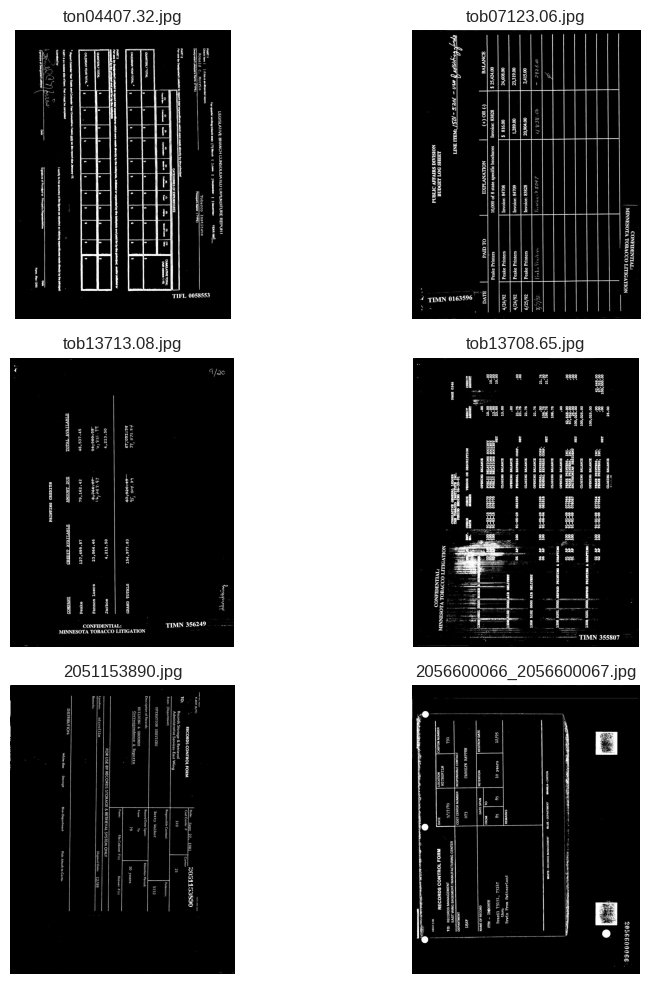

In [ ]:
# Selecciona 6 imágenes aleatorias
sample_images = vectorized_df.loc[vectorized_df.image_name.isin(['tob13708.65.jpg','tob07123.06.jpg','ton04407.32.jpg','2056600066_2056600067.jpg','2051153890.jpg','tob13713.08.jpg']),:]


# Crea una cuadrícula de 3x2 para mostrar las imágenes
fig, axes = plt.subplots(3, 2, figsize=(10, 10))


# Itera sobre las imágenes seleccionadas y las muestra
for i, (index, row) in enumerate(sample_images.iterrows()):
    image_name = row['image_name']
    image_path = df[df['image_name'] == image_name]['path'].values[0]
    img = mpimg.imread(image_path)


    row = i // 2
    col = i % 2
    axes[row, col].imshow(img)
    axes[row, col].set_title(image_name)
    axes[row, col].axis('off')


plt.tight_layout()
plt.show()

In [ ]:
# Aplica HDBSCAN para agrupar las imágenes en clústeres
clusterer = HDBSCAN(min_cluster_size=20, metric='euclidean')
cluster_labels = clusterer.fit_predict(embedding)


# Agrega las etiquetas de clúster al DataFrame
vectorized_df['cluster'] = cluster_labels


# Visualiza los clústeres con Plotly
fig = px.scatter(x=embedding[:, 0], y=embedding[:, 1], color=vectorized_df['cluster'])
fig.show()

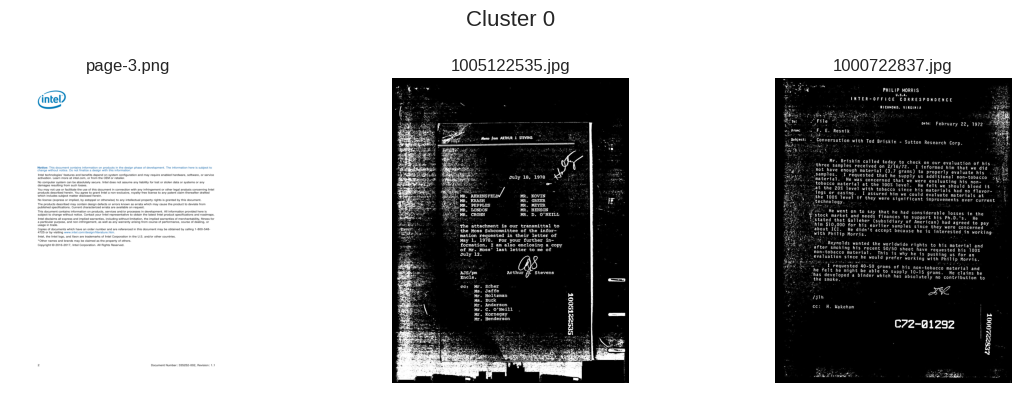

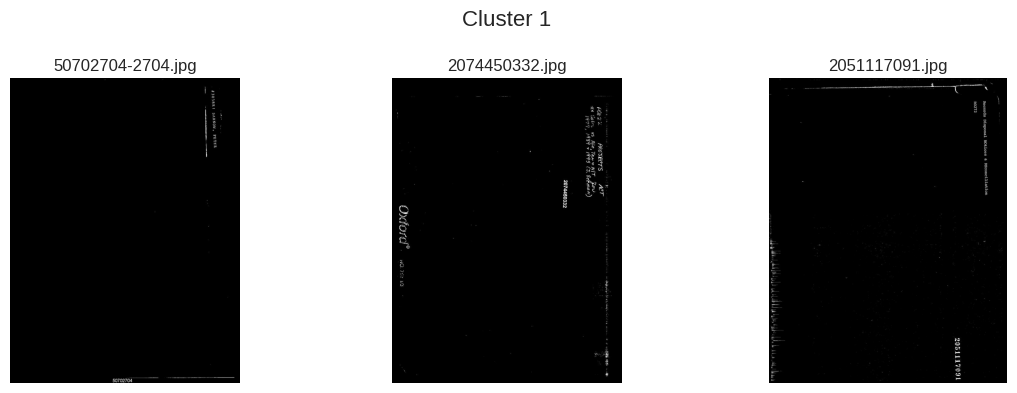

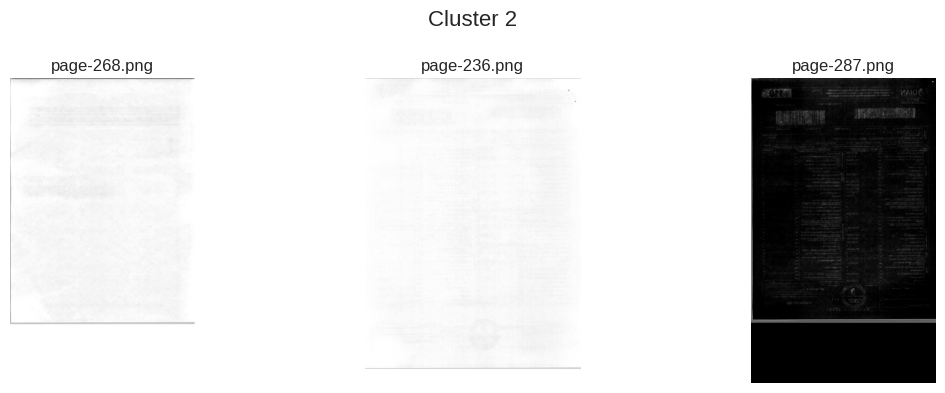

In [ ]:
# Obtiene los clústeres únicos
unique_clusters = vectorized_df['cluster'].unique()


# Itera sobre cada clúster y muestra 3 imágenes aleatorias
for cluster in unique_clusters:
    cluster_images = vectorized_df[vectorized_df['cluster'] == cluster]


    if len(cluster_images) >= 3:
        random_images = cluster_images.sample(n=3)


        fig, axes = plt.subplots(1, 3, figsize=(12, 4))
        fig.suptitle(f"Cluster {cluster}", fontsize=16)


        for i, (_, row) in enumerate(random_images.iterrows()):
            image_name = row['image_name']
            image_path = df[df['image_name'] == image_name]['path'].values[0]
            img = mpimg.imread(image_path)


            axes[i].imshow(img)
            axes[i].set_title(image_name)
            axes[i].axis('off')


        plt.tight_layout()
        plt.show()
    else:
        print(f"Cluster {cluster} does not have enough images for 3 random samples.")

In [ ]:
# Importa las librerías necesarias para el cálculo de la similitud coseno
import torch
import torch.nn as nn


# Elimina las columnas 'classification' y 'comparison' del DataFrame
vectorized_df.drop(['classification','comparison'], axis=1, inplace=True)


# Convierte el tipo de datos de la columna 'cluster' a str
subset = vectorized_df.iloc[:, 2:].astype(float)
subset['cluster'] = subset['cluster'].astype(str)


# Calcula la codificación media para cada clúster
mean_encodings = subset.groupby('cluster').mean(numeric_only=True).reset_index()


# Prepara las codificaciones medias para la comparación de similitud
mean_encodings_np = np.array(mean_encodings.iloc[:, 1:])


# Define la función de similitud coseno
cos_sim = nn.CosineSimilarity(dim=1, eps=1e-6)
classifications = []


# Calcula la similitud coseno para cada imagen con las codificaciones medias
for i in range(subset.shape[0]):
  row = subset.iloc[i,0:768]
  image_encoding = np.array(row.astype(float))
  similarities = cos_sim(torch.tensor(image_encoding), torch.tensor(mean_encodings_np))
  classification = torch.argmax(similarities).item()
  classifications.append(classification)


# Asigna las clasificaciones al DataFrame
vectorized_df['classification'] = classifications


# Compara la clusterización y la clasificación
vectorized_df['comparison'] = (vectorized_df['cluster'].astype(float) != vectorized_df['classification']).astype(int)


# Muestra el DataFrame con la comparación
print(vectorized_df[['image_name', 'cluster', 'classification', 'comparison']])

                      image_name cluster  classification  comparison
0                   page-115.png     0.0               0           0
1                   page-118.png     0.0               0           0
2                   page-116.png     0.0               0           0
3                   page-119.png     0.0               0           0
4                   page-117.png     0.0               0           0
..                           ...     ...             ...         ...
541          2071208438_8439.jpg     1.0               1           0
542  okl00210.33_okl00210.34.jpg     1.0               1           0
543                507844943.jpg     1.0               1           0
544          511230016+-0050.jpg     1.0               1           0
545          2081353217_3246.jpg     1.0               1           0

[546 rows x 4 columns]


In [ ]:
# Crea una columna 'category_number' donde 0 representa 'Documentos' y 1 representa 'Blanco'
vectorized_df['category_number'] = vectorized_df['category'].apply(lambda x: 0 if x == 'Documentos' else 1)


# Crea una columna 'classification_grouped' donde 1 representa los clústeres 1 y 2, y 0 representa los demás
vectorized_df['classification_gropuped'] = vectorized_df['classification'].apply(lambda x: 1 if ((x == 1)or(x == 2)) else 0)
vectorized_df

,image_name,category,0,1,2,3,4,5,6,7,...,763,764,765,766,767,cluster,classification,comparison,category_number,classification_gropuped
0,page-115.png,Documentos,-0.315636,0.068725,-0.090335,-0.128178,0.00139,-0.062738,-0.100207,0.037512,...,0.018816,0.025278,0.124202,-0.103547,0.080076,0.0,0,0,0,0
1,page-118.png,Documentos,-0.170368,0.140669,-0.238693,-0.210483,-0.139154,0.058996,-0.040271,0.132576,...,-0.016907,-0.016299,0.065682,-0.16195,0.080713,0.0,0,0,0,0
2,page-116.png,Documentos,-0.220081,0.049293,-0.119068,-0.115267,-0.018602,-0.022654,-0.100652,0.041567,...,0.037254,0.030907,0.124692,-0.088125,0.099843,0.0,0,0,0,0
3,page-119.png,Documentos,-0.310225,-0.076443,-0.126939,-0.098142,-0.005644,0.081857,-0.062517,-0.111736,...,0.134234,0.012593,0.017953,-0.066722,0.081208,0.0,0,0,0,0
4,page-117.png,Documentos,-0.400643,0.014283,-0.184069,-0.154823,-0.044634,-0.004957,-0.028908,-0.049648,...,-0.028662,0.073956,0.035246,-0.158397,0.004551,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,2071208438_8439.jpg,Blanco,0.101678,0.180627,0.096096,0.016784,-0.07485,-0.122392,-0.00532,0.192437,...,0.137715,-0.221648,-0.084781,0.178513,0.158904,1.0,1,0,1,1
542,okl00210.33_okl00210.34.jpg,Blanco,-0.057736,0.19143,-0.02104,0.067727,0.028237,0.079323,0.167978,0.075628,...,0.135768,-0.002507,-0.09249,0.122772,0.077157,1.0,1,0,1,1
543,507844943.jpg,Blanco,-0.112215,-0.046802,0.059627,-0.070976,-0.048061,0.005635,-0.089549,0.06127,...,0.104034,-0.042749,0.222101,0.074382,-0.016712,1.0,1,0,1,1
544,511230016+-0050.jpg,Blanco,-0.052875,0.102641,0.027375,-0.201436,-0.158221,-0.115848,0.020252,0.047663,...,0.130164,-0.187403,0.094497,0.024196,0.05465,1.0,1,0,1,1


In [ ]:
from sklearn.metrics import confusion_matrix


# Crea una matriz de confusión
cm = confusion_matrix(vectorized_df['category_number'], vectorized_df['classification_gropuped'])


# Visualiza la matriz de confusión con Plotly
fig = px.imshow(cm, text_auto=True, color_continuous_scale='Blues')
fig.update_layout(title='Confusion Matrix', xaxis_title='Predicted', yaxis_title='Actual')
fig.show()

In [ ]:
# Guarda las codificaciones medias en un archivo CSV
mean_encodings.to_csv('/content/drive/MyDrive/Notebooks/Concurso analítica no estructurada/Filtro de documentos/mean_encodings.csv', index=False)

# Test

In [ ]:
# Carga el modelo ViT pre-entrenado y el extractor de características
model = ViTModel.from_pretrained('google/vit-base-patch16-224-in21k')
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224-in21k')

In [ ]:
# Crea un DataFrame con información de las imágenes de prueba
df_test = create_image_df('/content/drive/MyDrive/Notebooks/Concurso analítica no estructurada/Filtro de documentos/Test')


# Aplica la función vectorize_image a cada fila del DataFrame de prueba
results = df_test.apply(vectorize_image, axis=1, args=(feature_extractor, model))


# Crea un nuevo DataFrame a partir de los resultados de la prueba
vectorized_df_test = pd.DataFrame(list(results))


# Cambia el formato de la columna 'encoding' a str
vectorized_df_test.encoding = vectorized_df_test.encoding.astype(str)


# Convierte la columna 'encoding' de una representación de cadena a matrices NumPy
vectorized_df_test['encoding'] = vectorized_df_test['encoding'].apply(lambda x: x.replace('[', '').replace(']', ''))


# Divide la columna 'encoding' en varias columnas
split_encodings = vectorized_df_test['encoding'].str.split(expand=True)


# Concatena las columnas divididas con el DataFrame original de prueba
vectorized_df_test = pd.concat([vectorized_df_test, split_encodings], axis=1)


# Elimina la columna 'encoding' original del DataFrame de prueba
vectorized_df_test = vectorized_df_test.drop('encoding', axis=1)

In [ ]:
# Carga las codificaciones medias desde el archivo CSV
mean_encodings = pd.read_csv('/content/drive/MyDrive/Notebooks/Concurso analítica no estructurada/Filtro de documentos/mean_encodings.csv')

In [ ]:
# Selecciona las columnas relevantes del DataFrame de prueba
subset = vectorized_df_test.iloc[:, 2:].astype(float)


# Prepara las codificaciones medias para la comparación de similitud
mean_encodings_np = np.array(mean_encodings.iloc[:, 1:])


# Define la función de similitud coseno
cos_sim = nn.CosineSimilarity(dim=1, eps=1e-6)
classifications = []


# Calcula la similitud coseno para cada imagen de prueba con las codificaciones medias
for i in range(subset.shape[0]):
  row = subset.iloc[i]
  image_encoding = np.array(row)
  similarities = cos_sim(torch.tensor(image_encoding), torch.tensor(mean_encodings_np))
  classification = torch.argmax(similarities).item()
  classifications.append(classification)


# Asigna las clasificaciones al DataFrame de prueba
vectorized_df_test['classification'] = classifications


# Crea un DataFrame con los resultados de la prueba
Results = vectorized_df_test[['image_name', 'category', 'classification']]


# Crea una columna 'category_number' donde 0 representa 'Documentos' y 1 representa 'Blanco'
Results['category_number'] = Results['category'].apply(lambda x: 0 if x == 'Documentos' else 1)


# Crea una columna 'classification_grouped' donde 1 representa los clústeres 1 y 2, y 0 representa los demás
Results['classification_gropuped'] = Results['classification'].apply(lambda x: 1 if ((x == 1)or(x == 2)) else 0)
Results

,image_name,category,classification,category_number,classification_gropuped
0,page-169.png,Blanco,1,1,1
1,page-168.png,Blanco,1,1,1
2,page-164.png,Blanco,2,1,1
3,page-170.png,Blanco,2,1,1
4,page-163.png,Blanco,2,1,1
...,...,...,...,...,...
242,page-84.png,Documentos,0,0,0
243,page-150.png,Documentos,0,0,0
244,page-148.png,Documentos,0,0,0
245,page-88.png,Documentos,0,0,0


In [ ]:
# Crea una matriz de confusión
cm = confusion_matrix(Results['category_number'], Results['classification_gropuped'])


# Visualiza la matriz de confusión con Plotly
fig = px.imshow(cm, text_auto=True, color_continuous_scale='Blues')
fig.update_layout(title='Confusion Matrix', xaxis_title='Predicted', yaxis_title='Actual')
fig.show()

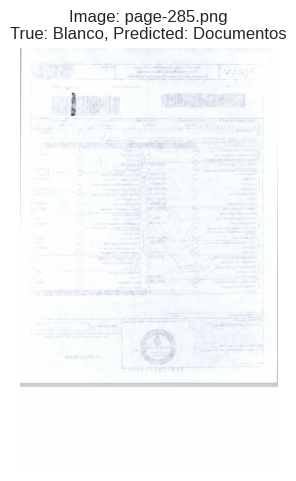

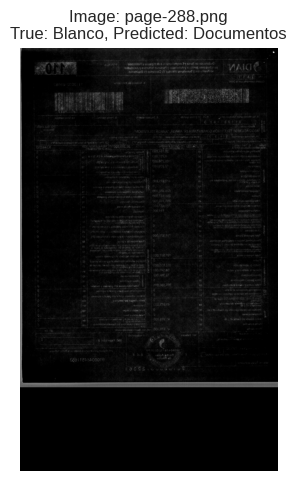

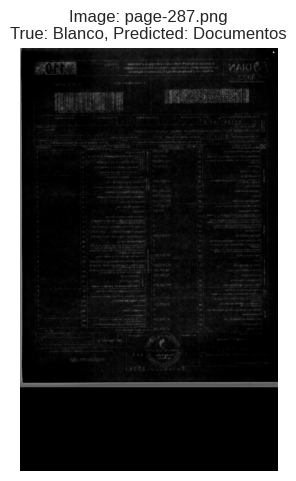

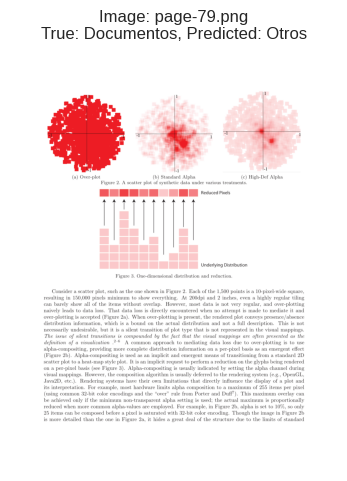

In [ ]:
# Filtra las imágenes mal clasificadas
misclassified_images = Results[Results['category_number'] != Results['classification_gropuped']]


# Itera sobre las imágenes mal clasificadas y las muestra
for _, row in misclassified_images.iterrows():
    image_name = row['image_name']
    image_path = df_test[df_test['image_name'] == image_name]['path'].values[0]  # Assuming df_test contains the image paths
    img = mpimg.imread(image_path)


    plt.figure()
    plt.imshow(img)
    plt.title(f"Image: {image_name}\nTrue: {row['category']}, Predicted: {'Otros' if row['classification_gropuped'] == 1 else 'Documentos'}")
    plt.axis('off')
    plt.show()



# ***Otras soluciones exploradas***

In [ ]:
# Importa las librerías necesarias para el procesamiento de imágenes y la clasificación con VGG16
import numpy as np
import pandas as pd
import plotly.express as px
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [ ]:
# Define los directorios y archivos de ejemplo
base_dir = '/content/drive/MyDrive/Notebooks/Concurso analítica no estructurada/Modelo filtro de documentos/Imagenes'
train_dir = os.path.join( base_dir, 'Train')
validation_dir = os.path.join( base_dir, 'Validation')
train_documents_dir = os.path.join(train_dir, 'Documentos')
train_blanco_dir = os.path.join(train_dir, 'Blanco')
validation_documents_dir = os.path.join(validation_dir, 'Documentos')
validation_blanco_dir = os.path.join(validation_dir, 'Blanco')


# Define los parámetros de aumento de datos para ImageDataGenerator
train_datagen = ImageDataGenerator(    rescale=1./255,  # Normalize pixel values to [0,1]
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   brightness_range=[0.8, 1.2],
                                   horizontal_flip=True,
                                   fill_mode='nearest')


# Define los parámetros de ImageDataGenerator para el conjunto de validación
test_datagen = ImageDataGenerator( rescale = 1.0/255. )


# Define el generador de datos de entrenamiento
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary',
                                                    target_size = (244, 244))


# Define el generador de datos de validación
validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'binary',
                                                          target_size = (244, 244))


# Define el directorio de prueba
test_dir = os.path.join( base_dir, 'Test')
test_documents_dir = os.path.join(train_dir, 'Documentos')
test_blanco_dir = os.path.join(train_dir, 'Blanco')


# Define los parámetros de ImageDataGenerator para el conjunto de prueba
test_datagen2 = ImageDataGenerator( rescale = 1.0/255. )


# Define el generador de datos de prueba
test_generator =  test_datagen2.flow_from_directory( test_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'binary',
                                                          target_size = (244, 244),
                                                          shuffle=True)



In [ ]:
# Obtiene los índices de clase del generador de datos de entrenamiento
train_generator.class_indices

In [ ]:
# Obtiene un lote de imágenes y etiquetas
images, labels = next(train_generator)


# Define los índices de clase
class_indices = {v: k for k, v in train_generator.class_indices.items()}


# Define una función para mostrar las imágenes con sus etiquetas de clase correspondientes
def plot_images(images, labels, class_indices, n=9):
    plt.figure(figsize=(10, 10))
    for i in range(n):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i])
        plt.title(class_indices[int(labels[i])])
        plt.axis('off')
    plt.show()


# Muestra las primeras 9 imágenes
plot_images(images, labels, class_indices, n=9)

In [ ]:
# Carga el modelo VGG16 pre-entrenado
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(244, 244, 3))

In [ ]:
# Define las capas del modelo
base_model.trainable = False
inputs = layers.Input(shape=(244, 244, 3)) # Match input shape to base_model
x = layers.Conv2D(3, (3, 3), padding='same')(inputs)
x = base_model(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.05))(x)
x = layers.Dropout(0.5)(x)  # Add another dropout
outputs = layers.Dense(1, activation='sigmoid')(x)  # Output layer for binary classification


# Crea el modelo
model = models.Model(inputs=inputs, outputs=outputs) # Use 'inputs' not 'base_model.input'
model.summary()


In [ ]:
# Define las funciones de precisión y recuperación
from keras import backend as K
def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision
def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


# Define una función de devolución de llamada para la matriz de confusión
class ConfusionMatrixCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        val_pred = np.argmax(self.model.predict(self.validation_data[0]), axis=-1)
        val_true = np.argmax(self.validation_data[1], axis=-1)
        cm = confusion_matrix(val_true, val_pred)
        print(f'Confusion matrix for epoch {epoch + 1}:\n{cm}')


# Define la ruta del punto de control del modelo
checkpoint_path = '/content/drive/MyDrive/Notebooks/Modelo Filtro documentos/model_checkpoint.keras'


# Crea una devolución de llamada ModelCheckpoint
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',  # or 'val_accuracy' if preferred
    save_best_only=True,  # Save only the best model
    mode='min',  # For 'val_loss', use 'min'; for 'val_accuracy', use 'max'
    verbose=1
)


# Define las devoluciones de llamada para el entrenamiento del modelo
early_stopping = EarlyStopping(monitor='val_loss',  # Metric to monitor
                               patience=10,          # Number of epochs with no improvement after which training will be stopped
                               restore_best_weights=True)  # Restore model weights from the epoch with the best value of the monitored metric
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-7)


# Compila el modelo
model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.BinaryAccuracy()])


In [ ]:
# Entrena el modelo
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=20,
                    #callbacks=[early_stopping, lr_reduction]
                    )


In [ ]:
# Descongela algunas capas en la base convolucional
for layer in base_model.layers[-5:]:  # Unfreeze last 20 layers, for example
    layer.trainable = True


# Compila el modelo nuevamente
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.BinaryAccuracy()])


# Entrena el modelo nuevamente
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=20,
                    #callbacks=[early_stopping, lr_reduction],
                    callbacks=[lr_reduction]
                    )

In [ ]:
# Descongela más capas en la base convolucional
for layer in base_model.layers[-25:]:  # Unfreeze last 20 layers, for example
    layer.trainable = True


# Compila el modelo por tercera vez
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.BinaryAccuracy()])


# Entrena el modelo por tercera vez
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=20,
                    #callbacks=[early_stopping, lr_reduction],
                    callbacks=[lr_reduction]
                    )


In [ ]:
# Evalúa el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(test_generator)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

In [ ]:
# Obtiene las etiquetas verdaderas
y_true = test_generator.classes

In [ ]:
# Obtiene un lote de imágenes y etiquetas de prueba
test_images, test_labels = next(test_generator)


# Muestra las imágenes con etiquetas verdaderas y probabilidades predichas
plt.figure(figsize=(12, 12))
for i in range(9):  # Plot the first 9 images
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[i])
    true_label = class_indices[int(test_labels[i])]
    predicted_prob = predictions[i][0]
    predicted_label = "Documento" if predicted_prob > 0.5 else "Blanco"
    plt.title(f"True: {true_label}\nPredicted: {predicted_label} ({predicted_prob:.2f})")
    plt.axis('off')
plt.show()


## Otra prueba

In [ ]:
# Obtiene un lote de imágenes y etiquetas
images, labels = next(train_generator)


# Define los índices de clase
class_indices = {v: k for k, v in train_generator.class_indices.items()}


# Define una función para mostrar las imágenes con sus etiquetas de clase correspondientes
def plot_images(images, labels, class_indices, n=9):
    plt.figure(figsize=(10, 10))
    for i in range(n):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i])
        plt.title(class_indices[int(labels[i])])
        plt.axis('off')
    plt.show()


# Muestra las primeras 9 imágenes
plot_images(images, labels, class_indices, n=9)

In [ ]:
# Define la forma de entrada
input_shape = (34, 34, 3)


# Construye el modelo
model = models.Sequential()


# Capa convolucional 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, padding='same'))  # Add padding to maintain spatial dimensions
model.add(layers.MaxPooling2D((2, 2)))


# Capa convolucional 2
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))  # Add padding
model.add(layers.MaxPooling2D((2, 2)))


# Capa convolucional 3
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))  # Add padding
model.add(layers.MaxPooling2D((2, 2)))


# Capa convolucional 4
# Reduce el número de capas de agrupación o usa el relleno 'same' aquí para evitar dimensiones negativas
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))


# Capas Flatten y Dense
model.add(layers.Flatten())  # The output shape of this layer is automatically calculated.
# You can insert a print statement here to check the output shape of the Flatten layer if needed: print(model.layers[-1].output_shape)
model.add(layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.05)))
model.add(layers.Dropout(0.5))  # Dropout for regularization
model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.05)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.05)))
model.add(layers.Dropout(0.5))  # Dropout for regularization
model.add(layers.Dense(1, activation='sigmoid'))  # Assuming binary classification


# Compila el modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


# Resumen del modelo
model.summary()

In [ ]:
# Define las devoluciones de llamada para el entrenamiento del modelo
early_stopping = EarlyStopping(monitor='val_loss',  # Metric to monitor
                               patience=8,          # Number of epochs with no improvement after which training will be stopped
                               restore_best_weights=True)  # Restore model weights from the epoch with the best value of the monitored metric
lr_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, min_lr=1e-7)


# Entrena el modelo
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs)
                    #callbacks=[early_stopping, lr_reduction]

# API

In [7]:
# Instalación de la librería Gradio.
!pip install --upgrade gradio

# Importación de librerías necesarias.
import gradio as gr  # Librería para crear interfaces de usuario.
import os  # Librería para interactuar con el sistema operativo.
from typing import List  # Librería para definir tipos de datos.
from PIL import Image  # Librería para manipulación de imágenes.
import torch  # Librería para realizar cálculos numéricos.
from sklearn.metrics.pairwise import cosine_similarity as cos_sim  # Función para calcular la similitud coseno.
import pandas as pd  # Librería para manipulación de datos.
from transformers import ViTModel, ViTFeatureExtractor  # Librerías para usar el modelo ViT.
import shutil  # Librería para realizar operaciones de archivos.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.2/93.2 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 8.3 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existing installation: tomlkit 0.13.2
    Uninstalling tomlkit-0.13.2:
      Successfully uninstalled tomlkit-0.13.2


In [19]:
# --- Función de clasificación ---
def clasificator(path):
    """
    Clasifica una imagen utilizando un modelo ViT preentrenado.

    Args:
        path (str): Ruta a la imagen que se va a clasificar.

    Returns:
        int: La clase predicha para la imagen.
    """
    # Carga del modelo ViT preentrenado.
    model = ViTModel.from_pretrained('google/vit-base-patch16-224-in21k')
    # Carga del extractor de características ViT preentrenado.
    feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224-in21k')
    # Carga de las codificaciones promedio desde un archivo CSV.
    mean_encodings_np = pd.read_csv('/content/drive/MyDrive/Notebooks/Concurso analítica no estructurada/Filtro de documentos/mean_encodings.csv').to_numpy()

    # Abre la imagen y la convierte a RGB.
    image = Image.open(path).convert('RGB')
    # Extrae las características de la imagen.
    inputs = feature_extractor(images=image, return_tensors="pt")
    # Obtiene la salida del modelo.
    outputs = model(**inputs)
    # Calcula la codificación promedio.
    encoding = outputs.last_hidden_state.mean(dim=1).detach().numpy()
    # Calcula la similitud coseno entre la codificación de la imagen y las codificaciones promedio.
    similarities = cos_sim(torch.tensor(encoding), torch.tensor(mean_encodings_np[:, 1:]))
    # Obtiene la clase con la mayor similitud.
    classification = torch.argmax(torch.tensor(similarities)).item()
    return classification


# --- Prueba de la función clasificator ---
#clasificator('/content/drive/MyDrive/Notebooks/Concurso analítica no estructurada/Filtro de documentos/Test/Documentos/page-10.png')

0

In [20]:
# --- Función para organizar imágenes en carpetas según su clasificación ---
def organize_images(image_paths: List[str], classified_images: dict):
    """
    Organiza las imágenes en carpetas según sus clases predichas.

    Args:
        image_paths (List[str]): Una lista de rutas a las imágenes.
        classified_images (dict): Un diccionario que mapea nombres de archivo a clases predichas.
    """
    # Crea la carpeta de salida si no existe.
    output_folder = "classified_images"
    os.makedirs(output_folder, exist_ok=True)
    # Itera sobre las rutas de las imágenes.
    for image_path in image_paths:
        # Obtiene el nombre del archivo.
        file_name = os.path.basename(image_path)
        # Obtiene la clase predicha para la imagen.
        predicted_class = classified_images.get(file_name)
        # Crea la carpeta para la clase si no existe.
        class_folder = os.path.join(output_folder, str(predicted_class))
        os.makedirs(class_folder, exist_ok=True)
        # Mueve la imagen a la carpeta correspondiente.
        os.rename(image_path, os.path.join(class_folder, file_name))
    return output_folder


# --- Interfaz de Gradio ---
def classify_and_download(dir):
    """
    Clasifica las imágenes en un directorio y las descarga en un archivo zip.

    Args:
        dir (gradio.File): Un directorio que contiene las imágenes a clasificar.

    Returns:
        gradio.File: Un archivo zip que contiene las imágenes clasificadas.
    """
    # Obtiene las rutas de las imágenes en el directorio.
    image_paths = []
    for file in dir:
        file_path = file.name
        if file_path.endswith(('.jpg', '.jpeg', '.png')):
            image_paths.append(file_path)
    # Clasifica las imágenes.
    classified_images = {}
    for image_path in image_paths:
        predicted_class = clasificator(image_path)
        classified_images[os.path.basename(image_path)] = predicted_class

    # Organiza las imágenes en carpetas.
    output_folder = organize_images(image_paths, classified_images)

    # Crea un archivo zip de las imágenes clasificadas.
    zip_file_path = shutil.make_archive("classified_images", 'zip', output_folder)

    # Devuelve el archivo zip.
    return gr.File(zip_file_path, label="Download Classified Images")


# Crea la interfaz de Gradio.
with gr.Blocks() as demo:
    # Define los componentes de la interfaz.
    input_folder = gr.File(file_count="directory", label="Input Folder")
    output_file = gr.File(label="Download Classified Images")
    show_button = gr.Button(value="Classify and Download")
    # Define la función que se ejecutará al hacer clic en el botón.
    show_button.click(classify_and_download, input_folder, output_file)

# Inicia la interfaz de Gradio.
demo.launch(debug=True)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://65148b17b944789755.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Zip file path: /content/classified_images.zip
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://65148b17b944789755.gradio.live
